In [25]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import waterfall_chart

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ------------------------------
# 1. Load and preprocess dataset
# ------------------------------
df = pd.read_csv("../datasets/loan_predication/loan_predication.csv")
df = df.drop(columns=['Loan_ID'])

df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [26]:
# Convert fairness_results to DataFrame
fairness_records = []

for model, fair in fairness_results.items():
    for metric, value in fair.items():
        if isinstance(value, dict):  # group-wise metrics
            for group, v in value.items():
                fairness_records.append({
                    "Model": model,
                    "Metric": f"{metric} (Group {group})",
                    "Value": v
                })
        else:  # single value metric
            fairness_records.append({
                "Model": model,
                "Metric": metric,
                "Value": value
            })

fairness_df = pd.DataFrame(fairness_records)

print("\n=== Regression Model Fairness (as DataFrame) ===")
fairness_df.pivot(index="Metric", columns="Model", values="Value").round(4)



=== Regression Model Fairness (as DataFrame) ===


Model,Decision Tree Regressor,Linear Regression,Random Forest Regressor
Metric,,,
Group MAE (Group 0),32.4918,35.6986,37.2998
Group MAE (Group 1),40.2074,40.3045,36.5436
Group RMSE (Group 0),52.0171,47.4724,65.6971
Group RMSE (Group 1),69.6492,62.8694,59.2901
Mean Prediction Difference,21.1510,15.6436,18.2289


<Figure size 1000x500 with 0 Axes>

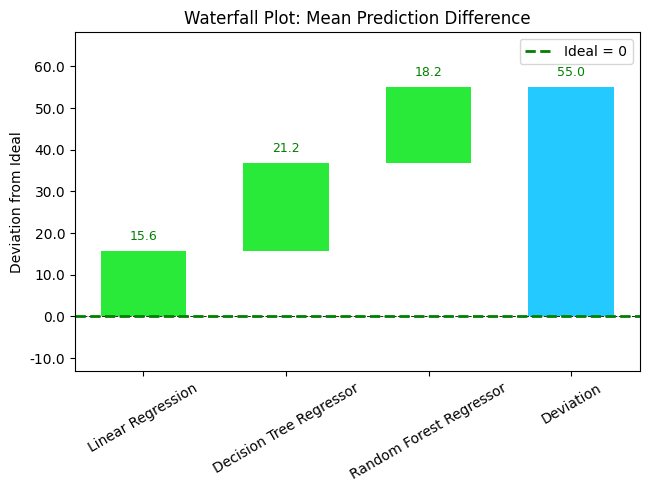

<Figure size 1000x500 with 0 Axes>

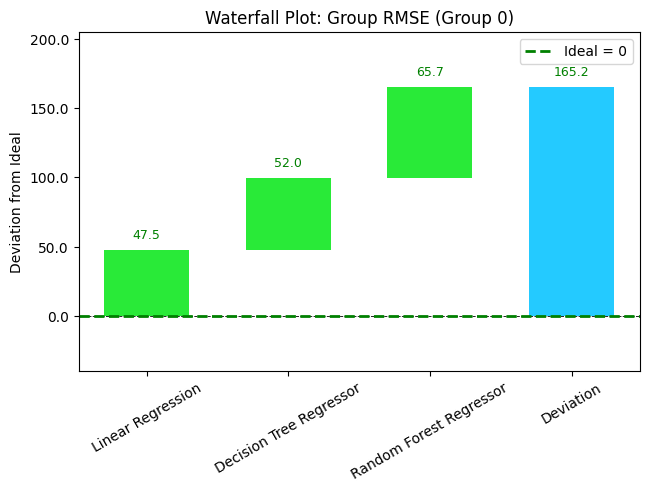

<Figure size 1000x500 with 0 Axes>

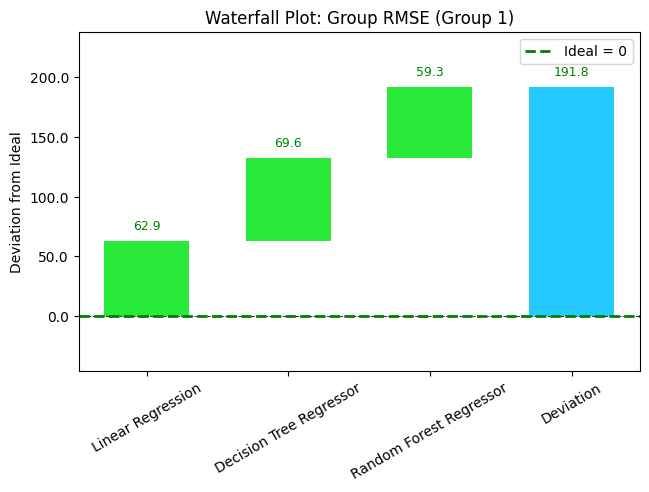

<Figure size 1000x500 with 0 Axes>

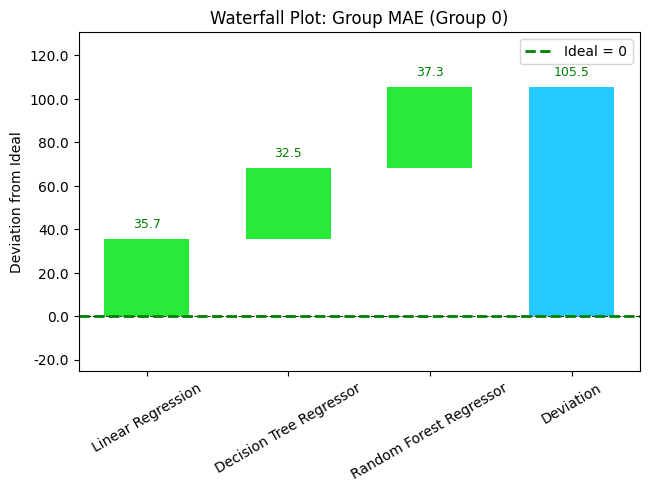

<Figure size 1000x500 with 0 Axes>

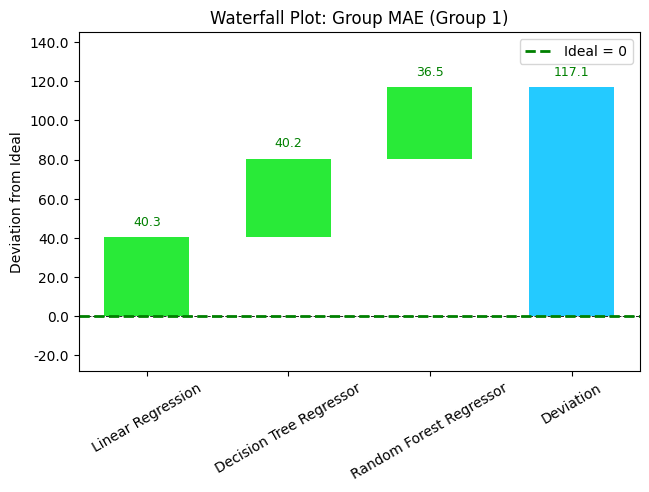

In [27]:
# ------------------------------
# 4. Waterfall Plots for Fairness Metrics
# ------------------------------

# --- MPD waterfall ---
mpd_vals = {model: fair["Mean Prediction Difference"] for model, fair in fairness_results.items()}
labels = list(mpd_vals.keys())
values = [v - 0.0 for v in mpd_vals.values()]  # ideal = 0
plt.figure(figsize=(10,5))
waterfall_chart.plot(labels, values, threshold=None, net_label="Deviation")
plt.axhline(0, color="green", linestyle="--", linewidth=2, label="Ideal = 0")
plt.title("Waterfall Plot: Mean Prediction Difference")
plt.ylabel("Deviation from Ideal")
plt.legend()
plt.show()

# --- Group RMSE waterfall ---
for group in [0,1]:
    group_vals = {model: fair["Group RMSE"].get(group, np.nan) for model, fair in fairness_results.items()}
    labels = list(group_vals.keys())
    values = [v - 0.0 for v in group_vals.values()]  # ideal = 0
    plt.figure(figsize=(10,5))
    waterfall_chart.plot(labels, values, threshold=None, net_label="Deviation")
    plt.axhline(0, color="green", linestyle="--", linewidth=2, label="Ideal = 0")
    plt.title(f"Waterfall Plot: Group RMSE (Group {group})")
    plt.ylabel("Deviation from Ideal")
    plt.legend()
    plt.show()

# --- Group MAE waterfall ---
for group in [0,1]:
    group_vals = {model: fair["Group MAE"].get(group, np.nan) for model, fair in fairness_results.items()}
    labels = list(group_vals.keys())
    values = [v - 0.0 for v in group_vals.values()]  # ideal = 0
    plt.figure(figsize=(10,5))
    waterfall_chart.plot(labels, values, threshold=None, net_label="Deviation")
    plt.axhline(0, color="green", linestyle="--", linewidth=2, label="Ideal = 0")
    plt.title(f"Waterfall Plot: Group MAE (Group {group})")
    plt.ylabel("Deviation from Ideal")
    plt.legend()
    plt.show()